In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
current_dir = os.getcwd()
src_path = os.path.join(current_dir, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

import viz
import grid
import cell
import FVM

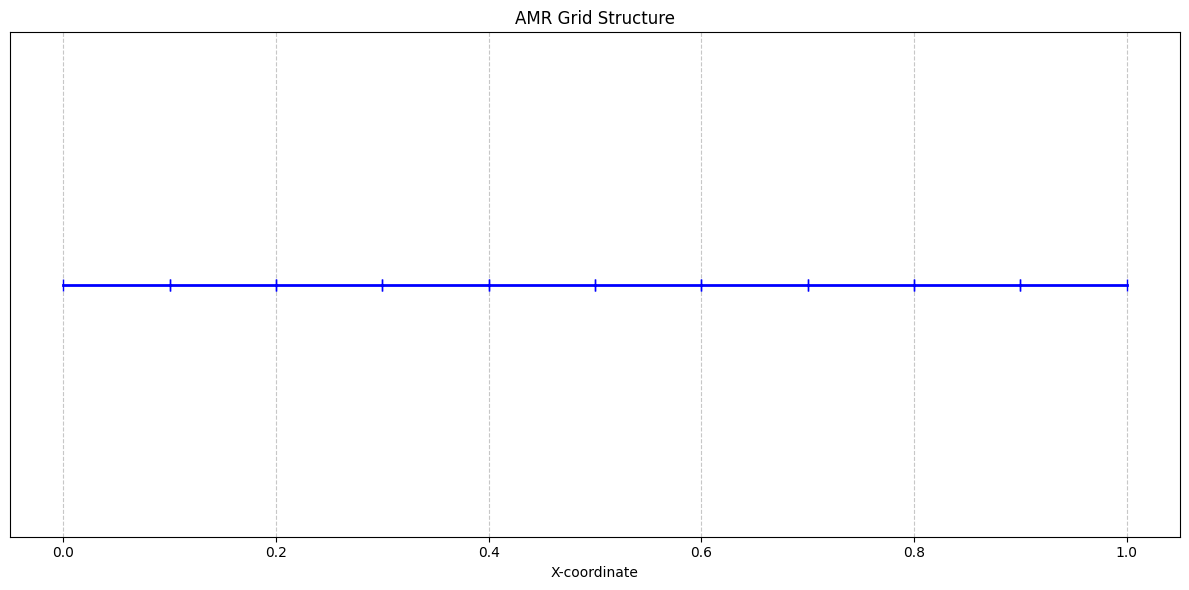

In [3]:
grid0 = grid.grid(1, 10)
viz.plot_amr_grid(grid0)

In [7]:
def init_grid(grid):
    """
    Initializes the primitive variables of the grid cells for the Sod Shock Tube problem.
    This function directly sets primitive values on cells.
    """
    active_cells = grid.get_all_active_cells()

    if not active_cells:
        print("No active cells found to initialize.")
        return

    cell_x_coords = np.array([cell.x for cell in active_cells])

    state_left = np.array([1.0, 0.0, 1.0])    # [density, velocity, pressure]
    state_right = np.array([0.125, 0.0, 0.1]) # [density, velocity, pressure]

    # Iterate through active cells and set their primitive variables directly
    for i, cell in enumerate(active_cells):
        if cell_x_coords[i] < 0.5:
            cell.prim = list(state_left)
        else:
            cell.prim = list(state_right)
    #  [rho_L, u_L, P_L, rho_R, u_R, P_R, gamma, x_diaphragm] for plotting analytical solution
    return [1, 0, 1, 0.125, 0, 0.1, FVM.get_gamma(), 0.5]

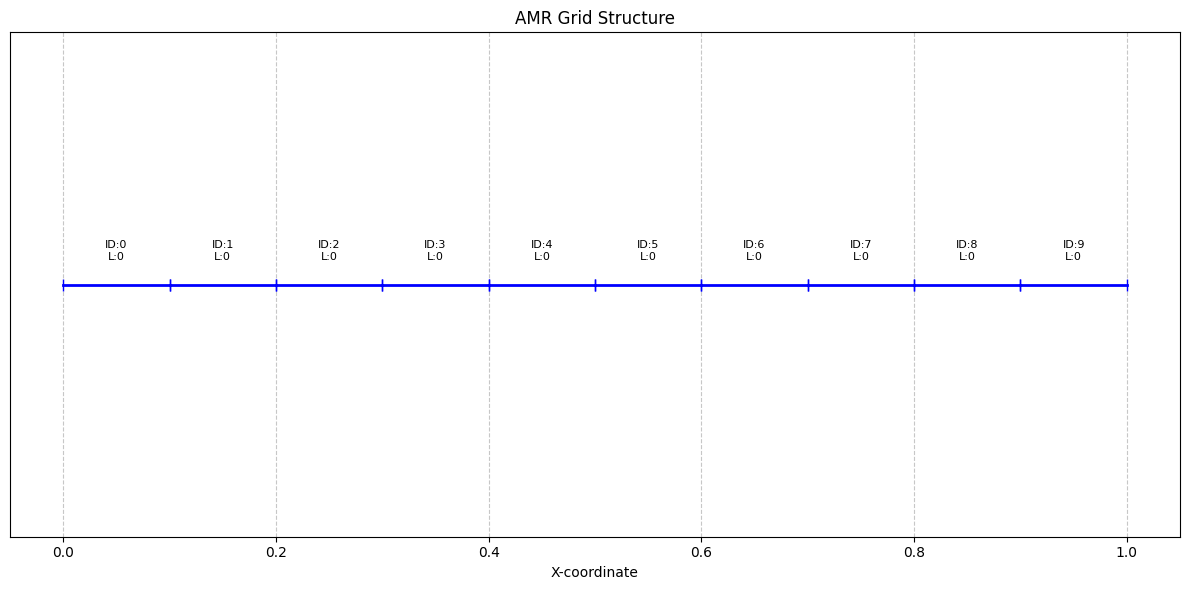

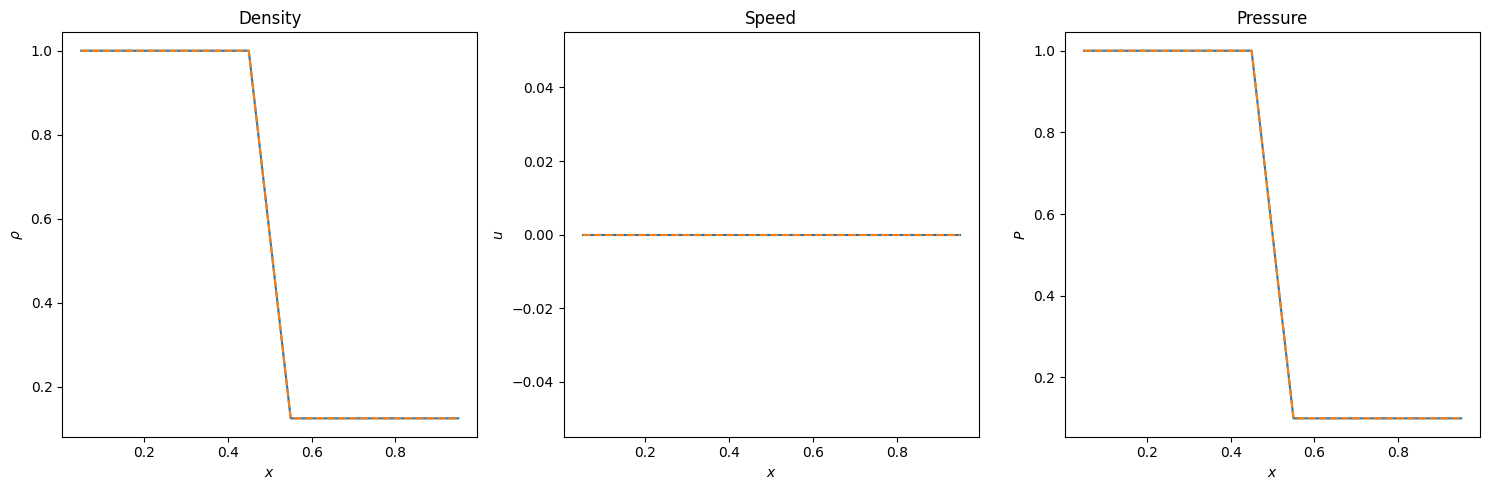

In [9]:
grid0 = grid.grid(1, 10)
init_con = init_grid(grid0)

viz.plot_amr_grid(grid0, label=True)
viz.plot_amr_value(grid0, analytic=init_con)

Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  3.44s/s]                


FINISHED
121


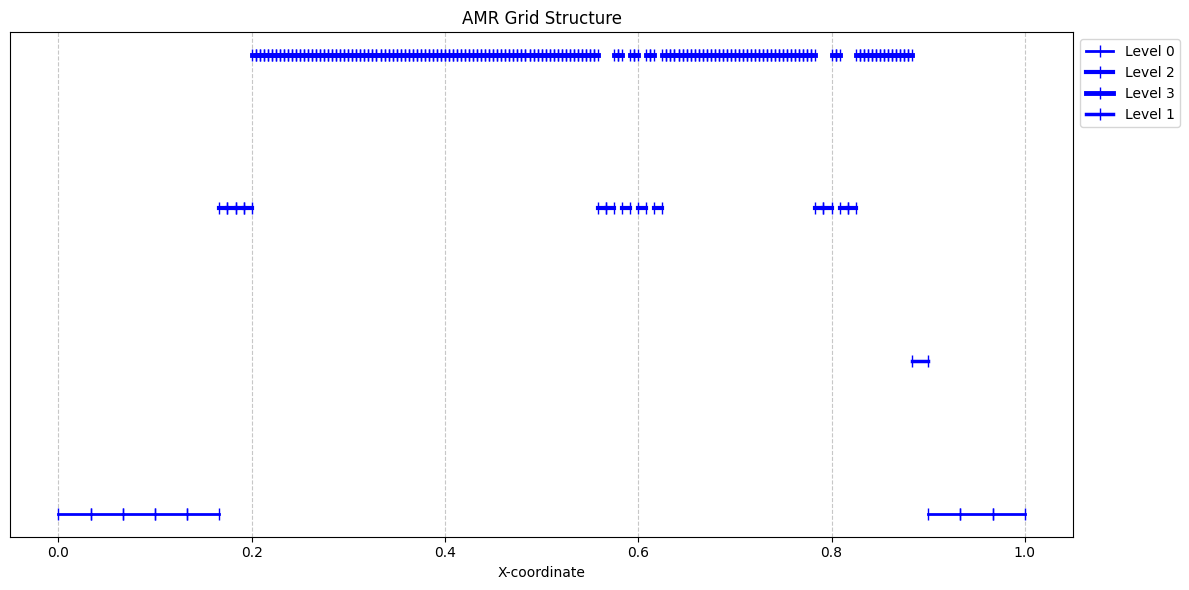

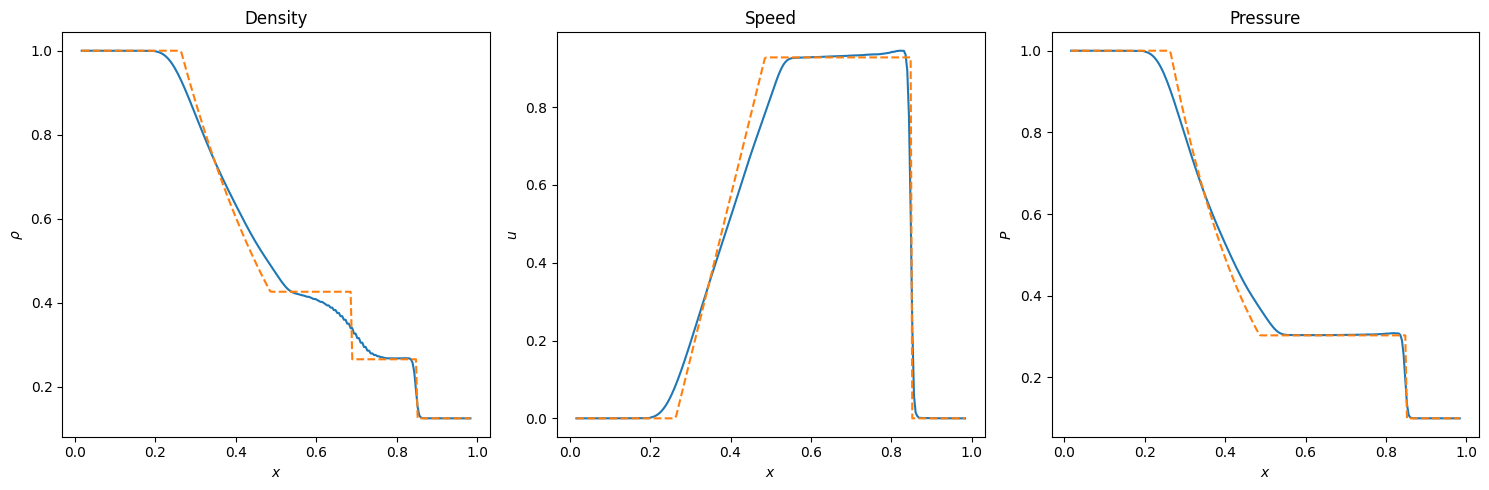

In [81]:
grid1 = grid.grid(L=1, N=30)
init_grid(grid1)
grid1_history = FVM.solve(FVM.HLL_flux, grid1, t_final=0.2, refine_epsilon=0.001, corase_epsilon=0.0001)
print(len(grid1_history))
viz.plot_amr_grid(grid1)
viz.plot_amr_value(grid1, analytic=init_con)
#viz.animate(grid1_history, 'plot/test.gif')

Preparing animation with 121 frames for display...


 99%|█████████▉| 120/121 [00:24<00:00,  4.40it/s]

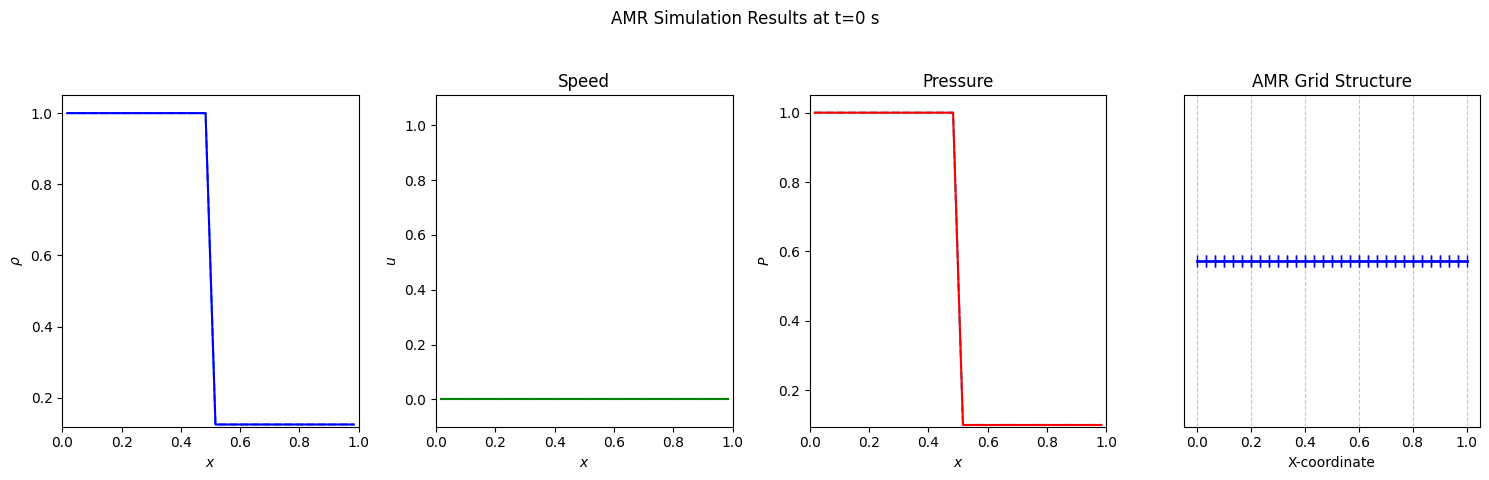

In [83]:
viz.animate(grid1_history, 'plot/test2.gif', fps=len(grid1_history)/5, analytic=init_con)

Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  3.16s/s]                 


FINISHED
132


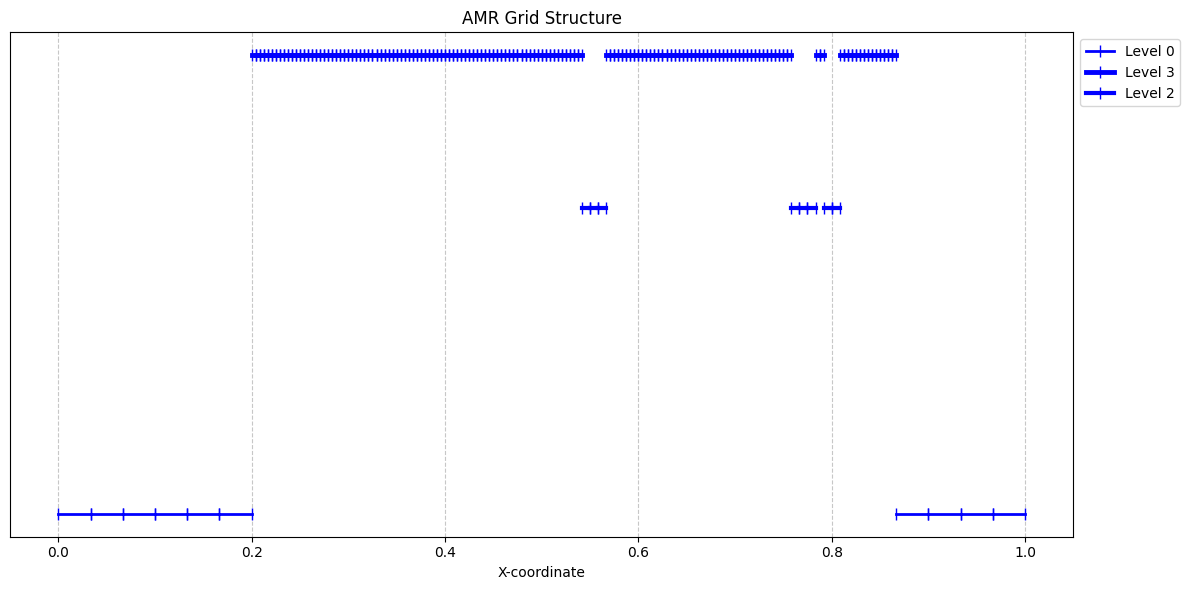

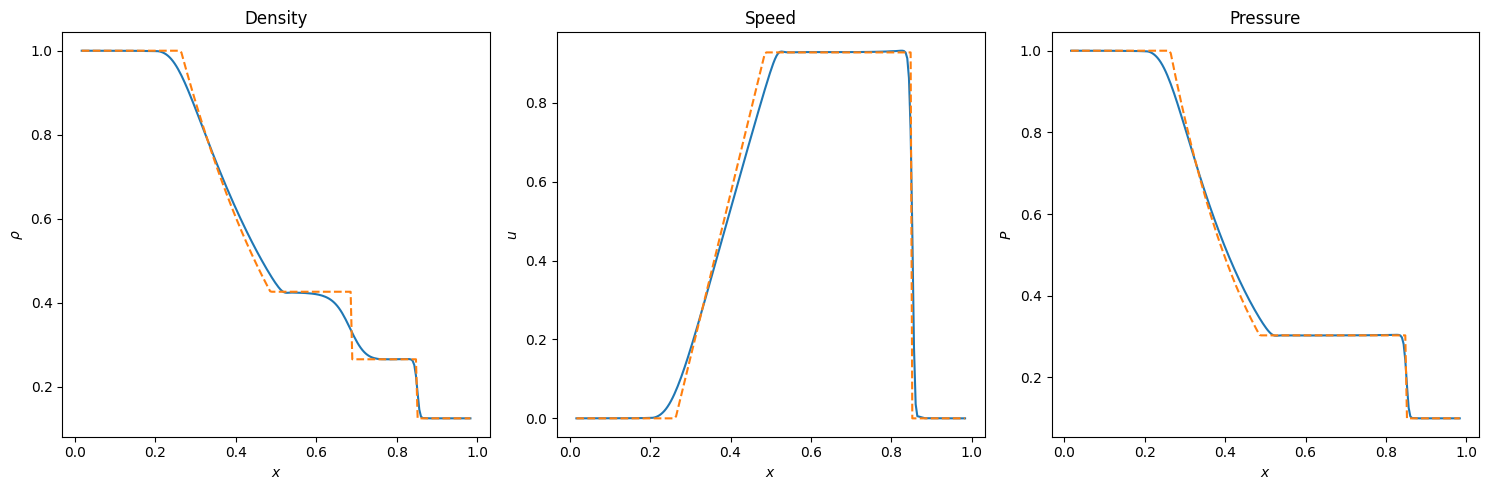

In [ ]:
grid2 = grid.grid(L=1, N=30)
init_grid(grid2)
grid2_history = FVM.new_solve(FVM.HLL_flux, grid2, t_final=0.2, epsilon=0.0001)
print(len(grid2_history))
viz.plot_amr_grid(grid2)
viz.plot_amr_value(grid2, analytic=init_con)

In [ ]:
viz.animate(grid2_history, 'plot/test3.gif')